In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv('mitbih_train.csv',header=None)
test_df=pd.read_csv('mitbih_test.csv',header=None)

In [3]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [5]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

0    20000
1    20000
2    20000
3    20000
4    20000
Name: 187, dtype: int64


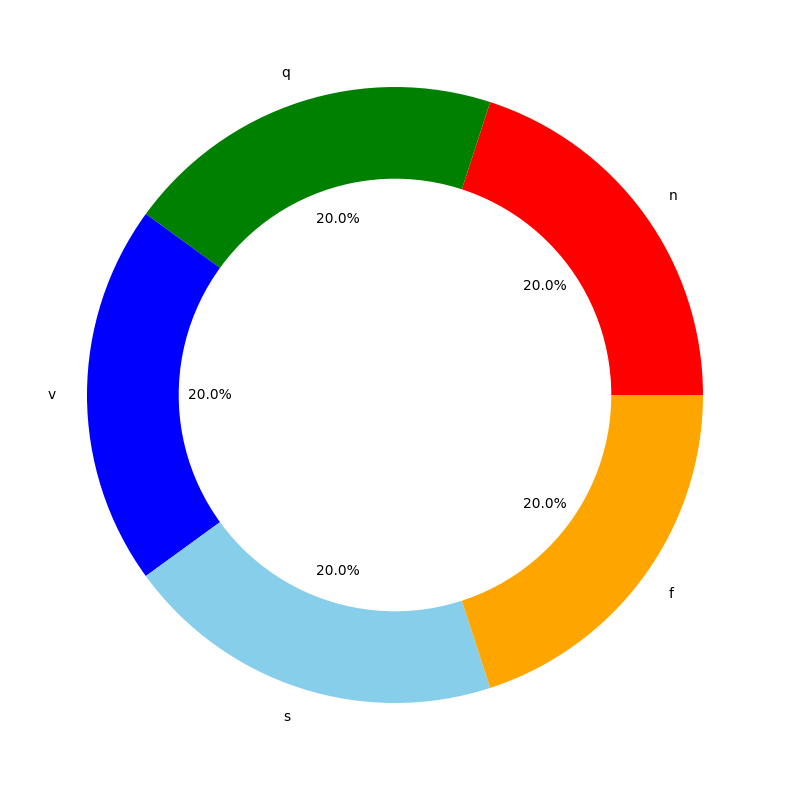

In [6]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
# -N : Non-ecotic beats (normal beat) -S : Supraventricular ectopic beats -V : Ventricular ectopic beats -F : Fusion Beats -Q : Unknown Beats

In [7]:
# lets look at all the classes
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
53721,0.979545,1.000000,0.622727,0.109091,0.000000,0.172727,0.247727,0.218182,0.206818,0.229545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
73461,1.000000,0.634731,0.428144,0.329341,0.266467,0.260479,0.266467,0.206587,0.227545,0.206587,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
77407,1.000000,0.886228,0.752994,0.517964,0.284431,0.167665,0.098802,0.115269,0.116766,0.106287,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80816,1.000000,0.890547,0.771144,0.525705,0.288557,0.205638,0.182421,0.160862,0.149254,0.140962,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
87097,0.762332,0.672646,0.578475,0.464873,0.349776,0.213752,0.137519,0.073244,0.050822,0.074738,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [8]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [9]:
## add alittle gaussian noise 
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.2,186)
    return (signal+noise)

In [10]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
for i in range(len(X_train)):
    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [30]:
# imports 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Convolution1D, MaxPool1D, BatchNormalization, Input, LSTM
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from attention import Attention



def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    hidden1 = LSTM(32, dropout=0.001, recurrent_dropout=0.001 )(pool3)
    # flatten=Flatten()(pool3)
    dense_end1 = Dense(32, activation='relu')(hidden1)
    dense_end2 = Dense(16, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=20),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
    
    return model, callbacks

    

In [31]:
model, callbacks = network(X_train,y_train,X_test,y_test) 

In [32]:
model.summary(line_length = 300)

Model: "model_4"
____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
 Layer (type)                                                                                                                          Output Shape                                                                                                            Param #                                      
 inputs_cnn (InputLayer)                                                                                                               [(None, 186, 1)]                                                                                                        0                                            
                                                                                

In [33]:
history=model.fit(X_train, y_train,epochs=15,callbacks=callbacks, batch_size=64,validation_data=(X_test,y_test))

Epoch 1/15
1563/1563 [==============================] - 71s 43ms/step - loss: 0.7509 - accuracy: 0.7168 - val_loss: 0.7796 - val_accuracy: 0.7154
Epoch 2/15
1563/1563 [==============================] - 69s 44ms/step - loss: 0.4815 - accuracy: 0.8250 - val_loss: 0.7896 - val_accuracy: 0.6746
Epoch 3/15
1563/1563 [==============================] - 70s 45ms/step - loss: 0.4289 - accuracy: 0.8441 - val_loss: 0.5514 - val_accuracy: 0.8040
Epoch 4/15
1563/1563 [==============================] - 68s 43ms/step - loss: 0.3971 - accuracy: 0.8543 - val_loss: 0.5685 - val_accuracy: 0.8000
Epoch 5/15
1563/1563 [==============================] - 72s 46ms/step - loss: 0.3764 - accuracy: 0.8606 - val_loss: 0.5186 - val_accuracy: 0.8165
Epoch 6/15
1563/1563 [==============================] - 65s 42ms/step - loss: 0.3603 - accuracy: 0.8669 - val_loss: 0.4180 - val_accuracy: 0.8428
Epoch 7/15
1563/1563 [==============================] - 64s 41ms/step - loss: 0.3450 - accuracy: 0.8717 - val_loss: 0.3950 -

In [34]:
from sklearn.metrics import precision_recall_fscore_support as score
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    # print(list(prediction))
    # print(list(y_true))
    cnf_matrix = confusion_matrix(y_true, prediction)
    precision, recall, fscore, support = score(list(y_true), list(prediction))

    print('precision: {}'.format(precision))
    print('recall:    {}'.format(recall))
    print('fscore:    {}'.format(fscore))

Accuracy: 84.56%


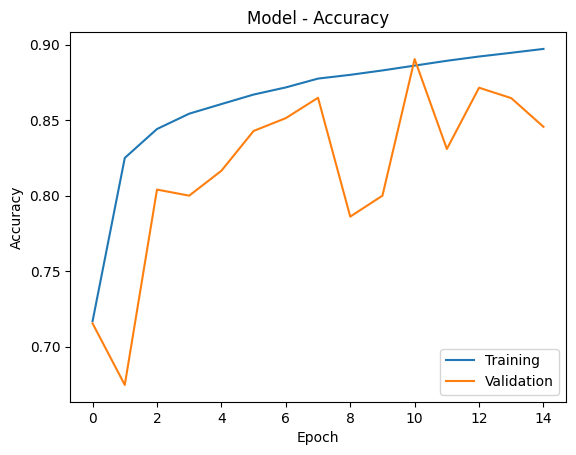

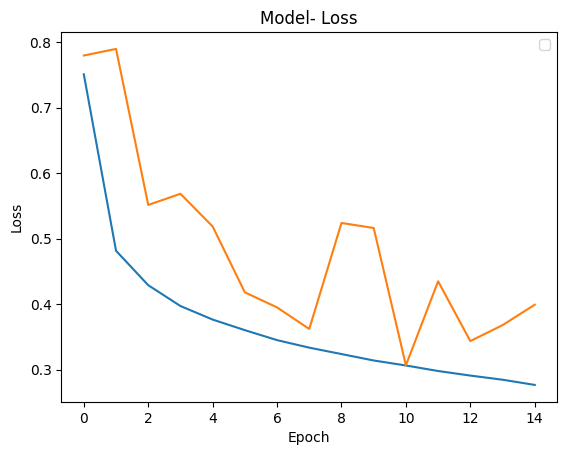

685/685 [==============================] - 3s 4ms/step
precision: [0.99 0.21 0.79 0.12 0.97]
recall:    [0.84 0.82 0.87 0.93 0.94]
fscore:    [0.91 0.33 0.83 0.22 0.95]


In [35]:
evaluate_model(history,X_test,y_test,model)
# 


685/685 [==============================] - 4s 5ms/step
Normalized confusion matrix


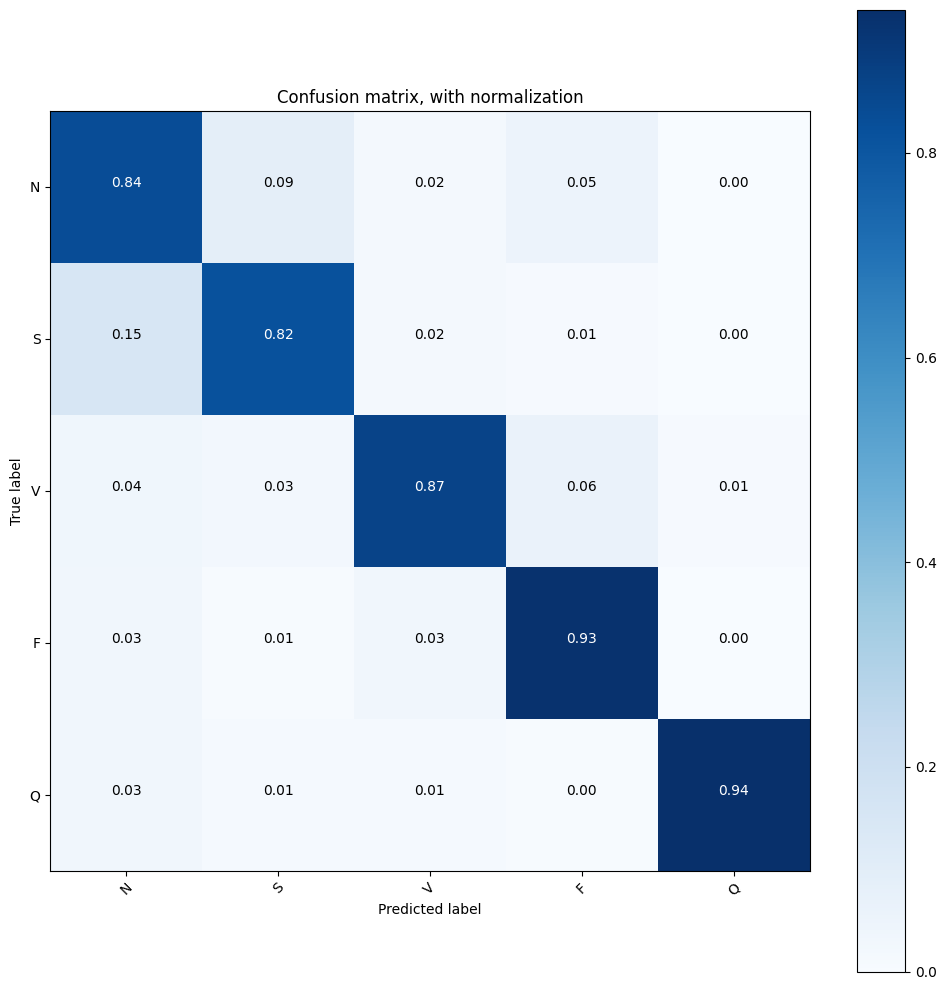

In [36]:
import itertools
y_pred=model.predict(X_test)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()s
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()